In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

from sklearn.feature_selection import RFECV, VarianceThreshold
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
#from ml-metrics import quadratic_weighted_kappa
random_state = 42

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./feature-selection-notebook.ipynb
./Ready_FS.csv
./cazymes_PA_metadata.csv
./metadata.csv
./.ipynb_checkpoints/feature-selection-notebook-checkpoint.ipynb


In [3]:
train_df = pd.read_csv('cazymes_PA_metadata.csv')
train_df = train_df.drop(columns=["Assembly accession", "MAG", "Family", "Genus"])
train_df.head()

,GT2_Glycos_transf_2,GT9,GT4,GT5,GT25,GH30_1,GH3,GH144,GT51,GH25,...,CBM77,CBM6+GH3,GH51+CBM35,GH18+CBM73,CBM32+PL7_5,PL7_5+4.2.2.3,CBM47+PL7_3,CBM16+CBM47+PL7_3,CBM47+CBM6+CBM47+CBM6,Origin
0,1,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,Non_marine
1,1,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,Marine
2,1,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,Marine
3,1,1,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,Marine
4,1,0,1,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,Non_marine


In [16]:
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
print(X_train.shape)
print(y_train.shape)

(1256, 749)
(1256,)


# 1. Unsupervised approach
Reference:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection****

In [5]:
X_train2_unsup  = X_train.copy() #deep copy

## Drop by the missing rate

In [6]:
#Suppose you data now contains some missing data, you want to filter the data with very high missing rate.
X_train2_unsup['dump'] = np.nan
X_train2_unsup2 = X_train2_unsup.dropna(axis=1, thresh=0.8) #drop the columns with missing rate > 80%
print(X_train2_unsup.shape)
print(X_train2_unsup2.shape) #drop the demp column

(1256, 750)
(1256, 749)


## Drop by the variance

In [7]:
selector = VarianceThreshold(0.1) #original: 0.7
selector.fit(X_train2_unsup2)
X_train2_unsup3 = X_train2_unsup2[X_train2_unsup2.columns[selector.get_support(indices=True)]]
print('number of columns after dropping by variance threshold:', X_train2_unsup3.shape[1])

number of columns after dropping by variance threshold: 92


# 2. supervised approach

In [8]:
X_train2_sup = X_train.copy() #deep copy

========== LogisticRegression ==========
Accuracy in training: 0.9721115537848606
Accuracy in valid: 0.8248756218905473
Show top 10 important features:


/home/sandra/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


,feature_importance,ranking
GH154,0.993730,1.0
GT1,0.931085,2.0
CBM6+GH81,0.864846,3.0
CBM48+GH13,0.841954,4.0
GT83,0.772383,5.0
CBM47,0.769294,6.0
GH5_2,0.760716,7.0
CBM32+CBM32,0.693997,8.0
CBM9,0.692009,9.0
GH0,0.690138,10.0


========== ExtraTreesClassifier ==========
Accuracy in training: 0.7450199203187251
Accuracy in valid: 0.6965174129353234
Show top 10 important features:


,feature_importance,ranking
GH25,0.060353,1.0
GH13_20,0.049495,2.0
CE12,0.038776,3.0
CE4,0.035116,4.0
GH97,0.033311,5.0
GH113,0.031507,6.0
GT20,0.029436,7.0
GT83,0.028062,8.0
GH15,0.027582,9.0
CE8+PL10_1,0.026900,10.0


========== RandomForestClassifier ==========
Accuracy in training: 0.7091633466135459
Accuracy in valid: 0.6746268656716418
Show top 10 important features:


,feature_importance,ranking
GT83,0.129743,1.0
GH113,0.111111,2.0
GH144,0.087385,3.0
GH74,0.080082,4.0
GH30_3,0.079004,5.0
CBM48+GH13_9,0.057937,6.0
GH109,0.054866,7.0
GH67,0.052636,8.0
GH25,0.052427,9.0
GH97,0.043845,10.0


CPU times: user 1.01 s, sys: 63.9 ms, total: 1.08 s
Wall time: 773 ms


Text(0.5, 0, 'Number of features selected')

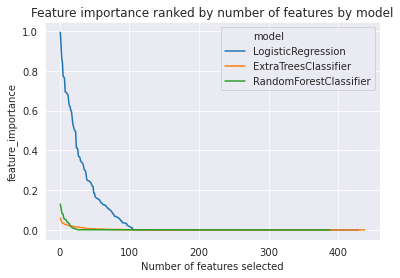

In [9]:
%%time
X_model, X_valid, y_model, y_valid = train_test_split(X_train2_sup, y_train, stratify=y_train, random_state=random_state, test_size=.8)

model_dict = {'LogisticRegression': LogisticRegression(penalty='l1', solver='saga', C=2, multi_class='multinomial', n_jobs=-1, random_state=random_state)
             , 'ExtraTreesClassifier': ExtraTreesClassifier(n_estimators=200, max_depth=3, min_samples_leaf=.06, n_jobs=-1, random_state=random_state)
              , 'RandomForestClassifier': RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_leaf=.1, random_state=random_state, n_jobs=-1)
             }
estimator_dict = {}
importance_fatures_sorted_all = pd.DataFrame()
for model_name, model in model_dict.items():
    print('='*10, model_name, '='*10)
    model.fit(X_model, y_model)
    print('Accuracy in training:', accuracy_score(model.predict(X_model), y_model))
    print('Accuracy in valid:', accuracy_score(model.predict(X_valid), y_valid))
    importance_values = np.absolute(model.coef_) if model_name == 'LogisticRegression' else model.feature_importances_
    importance_fatures_sorted = pd.DataFrame(importance_values.reshape([-1, len(X_train2_sup.columns)]), columns=X_train2_sup.columns).mean(axis=0).sort_values(ascending=False).to_frame()
    importance_fatures_sorted.rename(columns={0: 'feature_importance'}, inplace=True)
    importance_fatures_sorted['ranking']= importance_fatures_sorted['feature_importance'].rank(ascending=False)
    importance_fatures_sorted['model'] = model_name
    print('Show top 10 important features:')
    display(importance_fatures_sorted.drop('model', axis=1).head(10))
    importance_fatures_sorted_all = importance_fatures_sorted_all.append(importance_fatures_sorted)
    estimator_dict[model_name] = model

plt.title('Feature importance ranked by number of features by model')
sns.lineplot(data=importance_fatures_sorted_all, x='ranking', y='feature_importance', hue='model')
plt.xlabel("Number of features selected")

In [10]:
selected_model = 'LogisticRegression'
number_of_features = 60
select_features_by_model = importance_fatures_sorted_all[importance_fatures_sorted_all['model'] == selected_model].index[:number_of_features].tolist()

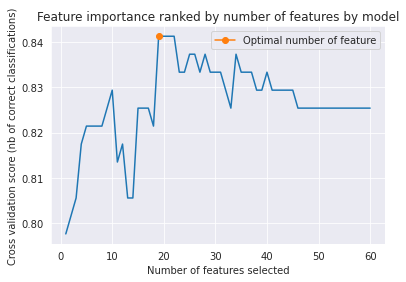

CPU times: user 2.18 s, sys: 88.8 ms, total: 2.27 s
Wall time: 4.58 s


In [11]:
%%time
#it takes much more time comparing 
rfecv = RFECV(estimator=model_dict['LogisticRegression'].set_params(max_iter=150, C=1), step=1, cv=StratifiedShuffleSplit(1, test_size=.2, random_state=random_state), scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train2_sup[select_features_by_model], y_train)
plt.figure()
plt.title('Feature importance ranked by number of features by model')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.plot(rfecv.n_features_, rfecv.grid_scores_[rfecv.n_features_-1], marker='o', label='Optimal number of feature')
plt.legend(loc='best')
plt.show()

In [12]:
rfecv_df = pd.DataFrame({'col': select_features_by_model})
rfecv_df['rank'] = np.nan
for index, support in enumerate(rfecv.get_support(indices=True)):
    rfecv_df.loc[support, 'rank'] = index
for index, rank in enumerate(rfecv.ranking_ -2):
    if rank >= 0:
        rfecv_df.loc[index, 'rank'] = rfecv.n_features_ + rank
rfecv_df

,col,rank
0,GH154,0.0
1,GT1,1.0
2,CBM6+GH81,2.0
3,CBM48+GH13,3.0
4,GT83,30.0
5,CBM47,25.0
6,GH5_2,37.0
7,CBM32+CBM32,4.0
8,CBM9,20.0
9,GH0,45.0


Automatically created module for IPython interactive environment
Optimal number of features : 134


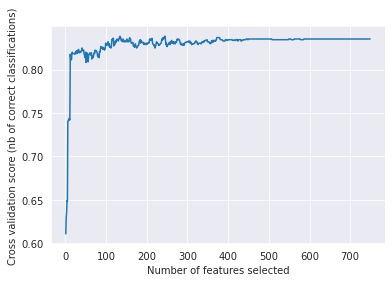

In [17]:
# Recursive feature elimination with cross-validation¶
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()